# Centrality Types


In [1]:

%load_ext autoreload
%autoreload 2

import networkx as nx
from src.retriever import *
from src.rust_network import RustNetworkAnalysis, get_verse_rust_network
from src.network_plots import (
    get_target_verses,
    plot_centrality_based_subgraph,
)
from src.utils import connect_and_load_milvus_collection

texts = ["Bible_NT", "Quran", "Torah", "Gita", "Analects"]  # "Bible",

# encoder_model = "jina_clip_v1"
encoder_model = "all_MiniLM_L6_v2"
collection = connect_and_load_milvus_collection(public_ip="23.20.119.96",encoder_model=encoder_model)
parameter = "05_threshold"
similarity_threshold = 0.5
parameter_path_dict = {"0.5" : "05_threshold" , "0.75" : "075_threshold"}

 This notebook has the purpose of illustrating centrality types in Gita's maximum closeness centrality vicinity!

In [2]:
text='Gita'

target_verses = get_target_verses(texts=[text], collection=collection, encoder_model=encoder_model)

G_rust = get_verse_rust_network(
    collection,
    [text],
    target_verses,
    encoder_model=encoder_model,
    similarity_threshold=similarity_threshold,
)

rust_analysis = RustNetworkAnalysis(
    G_rust, encoder_model=encoder_model, parameter=parameter
)

rust_analysis.run()
rust_analysis.run_stats()
special_nodes = rust_analysis.get_special_nodes()
(
    degree_centrality_verse,
    betweenness_centrality_verse,
    closeness_centrality_verse,
    eigenvector_centrality_verse,
) = rust_analysis.get_special_verses(target_verses)

100%|██████████| 625/625 [01:54<00:00,  5.44it/s]


Calculating average Degree
Running average clustering coefficient
Running network density
Running average path length
Running average degree centrality
Running average betweenness centrality
Running average closeness centrality
Running average eigenvector centrality
Running get component length histogram
Calculating highest degree centrality
Calculating highest betweenness centrality
Calculating highest closeness centrality
Calculating highest eigenvector centrality
Calculating degree centrality histogram
Calculating betweenness centrality histogram
Calculating closeness centrality histogram
Calculating eigenvector centrality histogram


In [3]:
betweenness_centrality_verse_index = rust_analysis.calculate_highest_betweenness_centrality_index()
closeness_centrality_verse_index  = rust_analysis.calculate_highest_closeness_centrality_index()
degree_centrality_verse_index = rust_analysis.calculate_highest_degree_centrality_index()

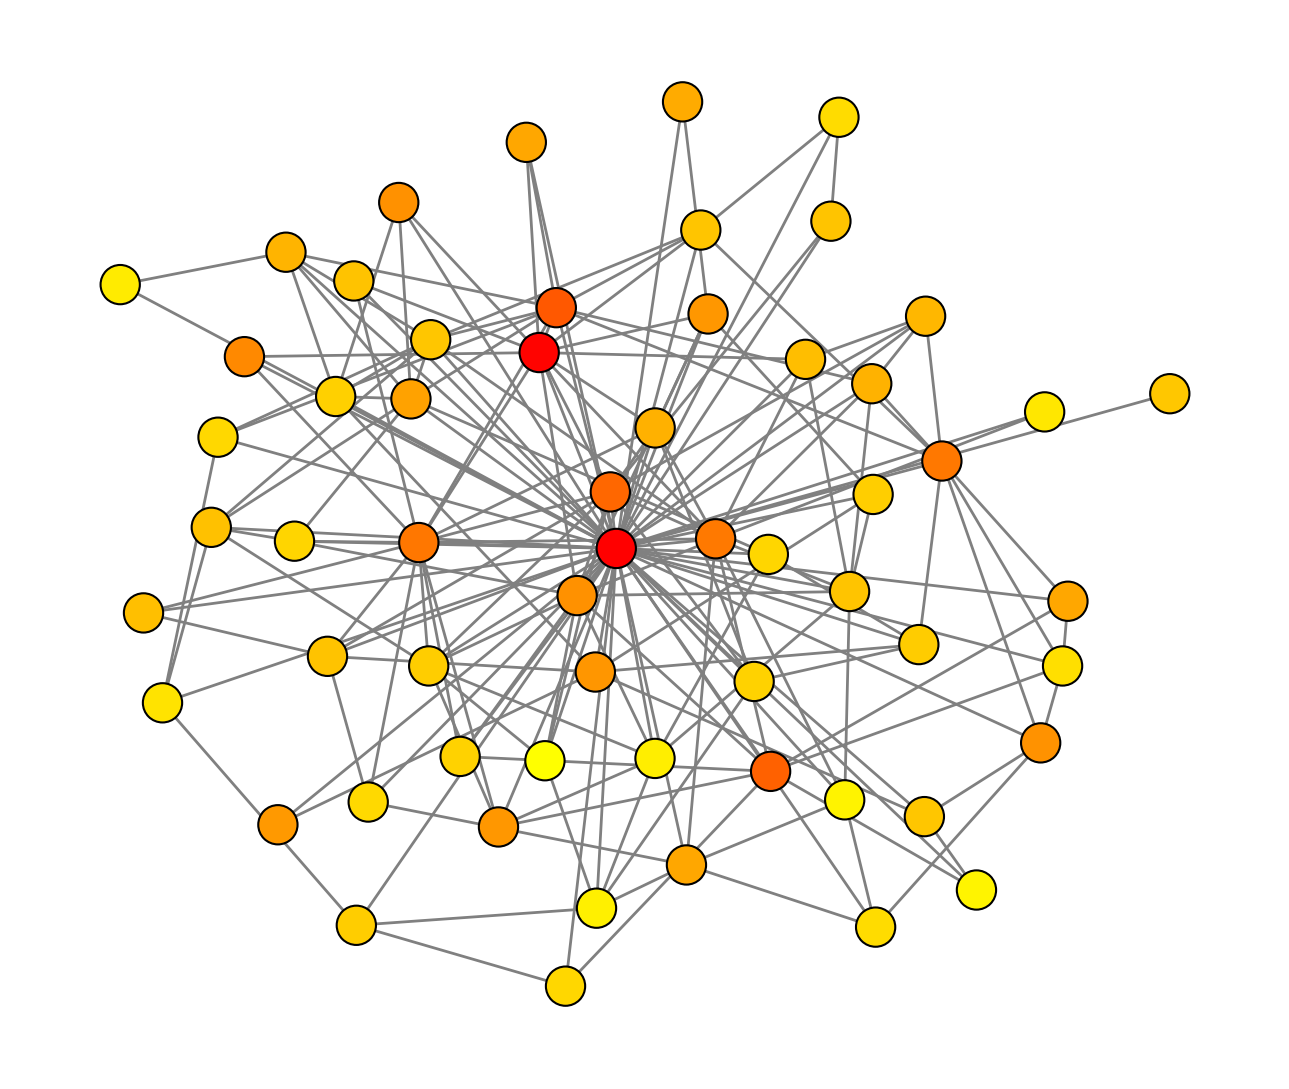

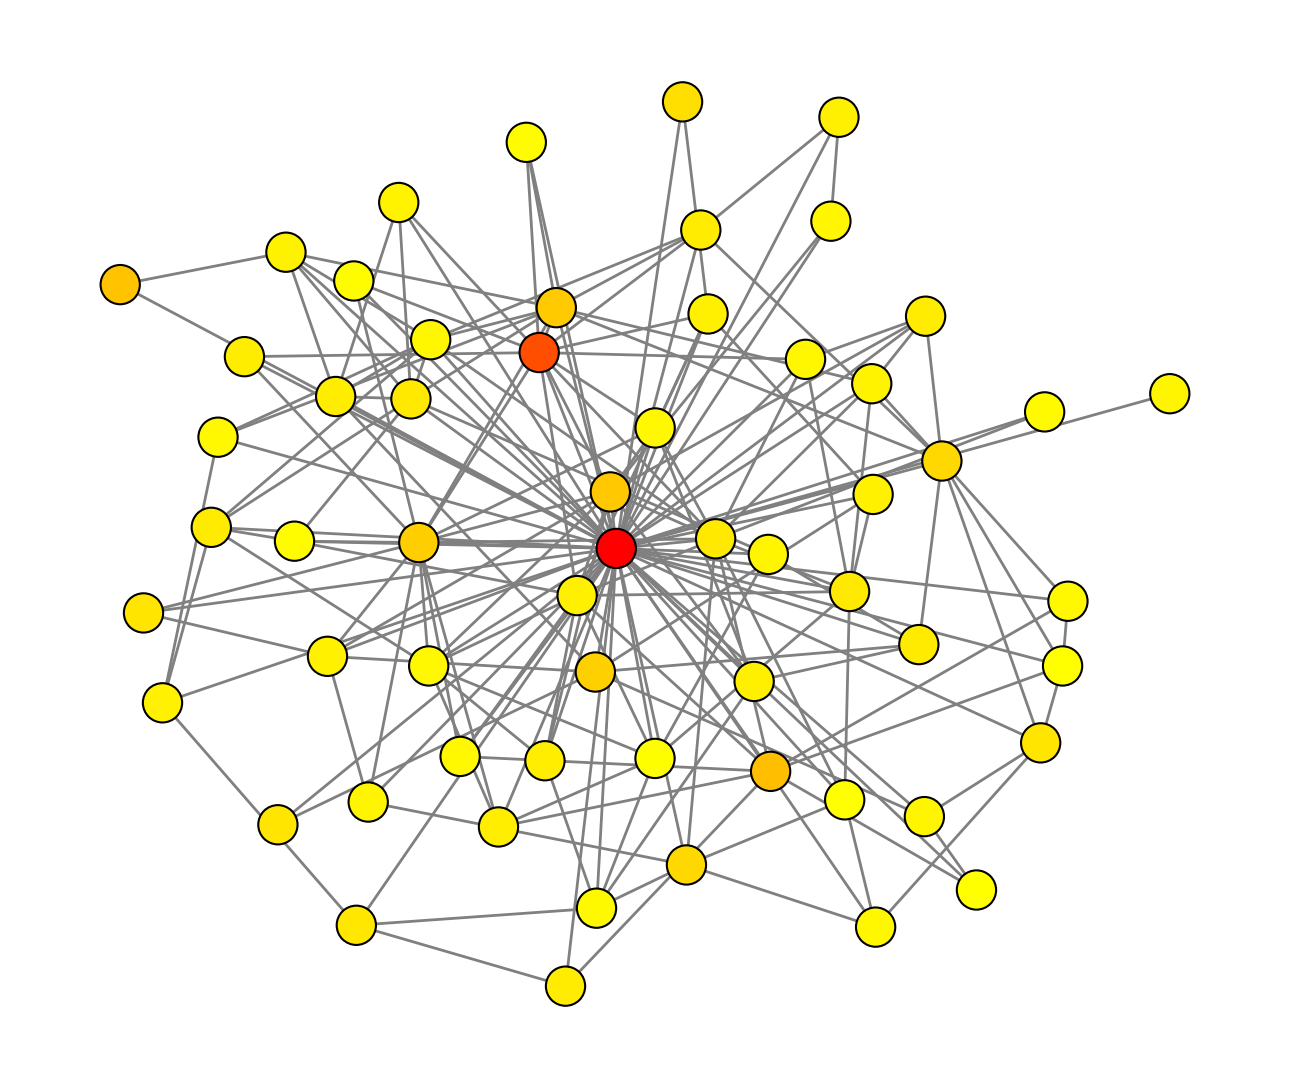

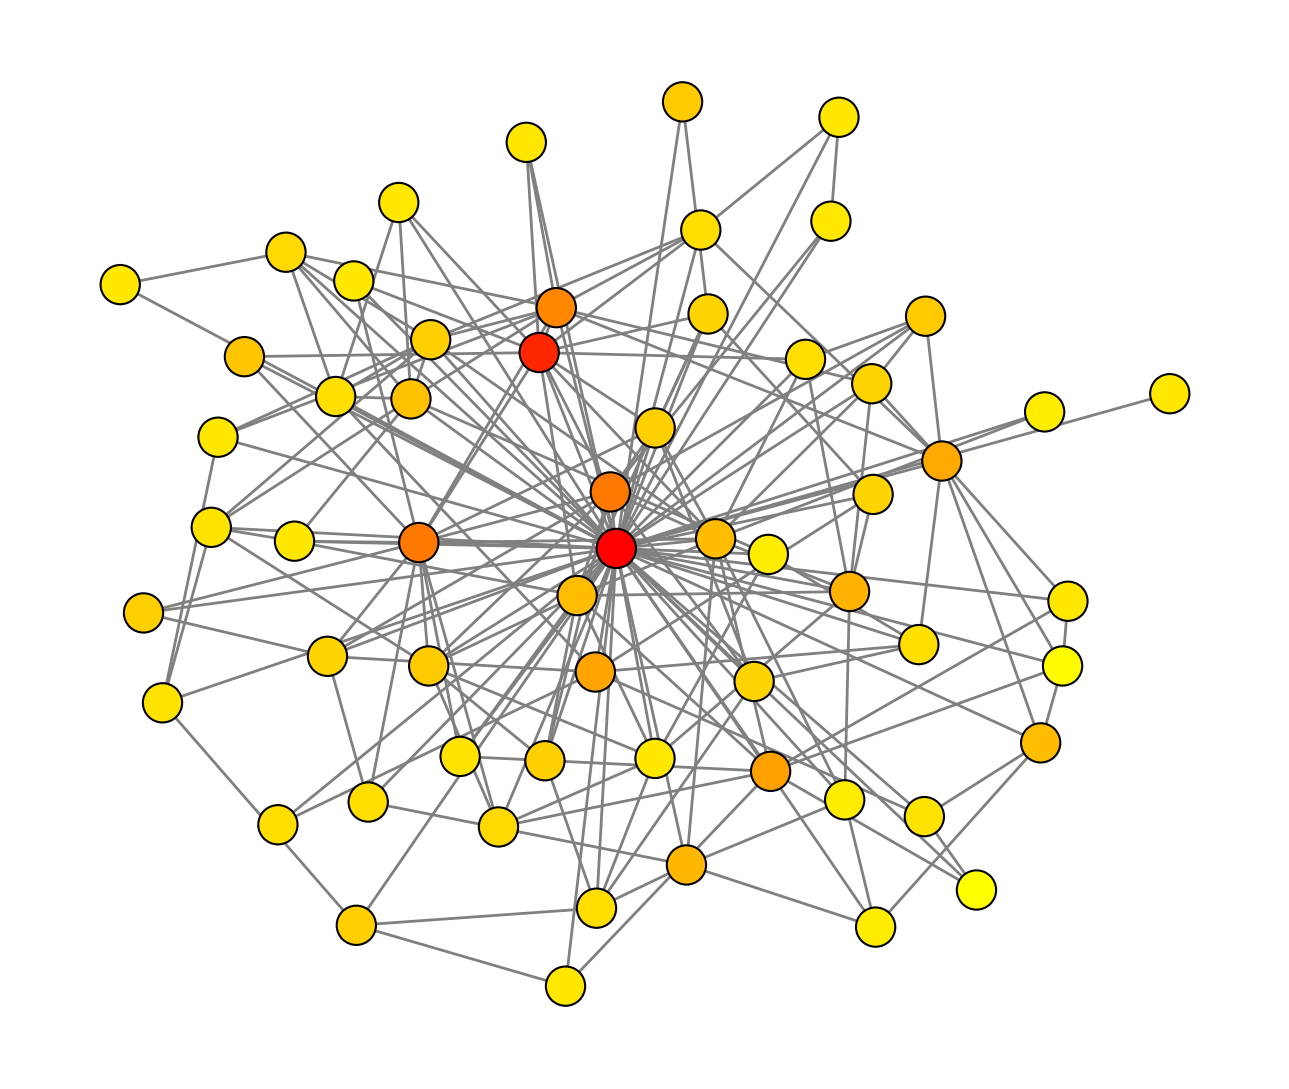

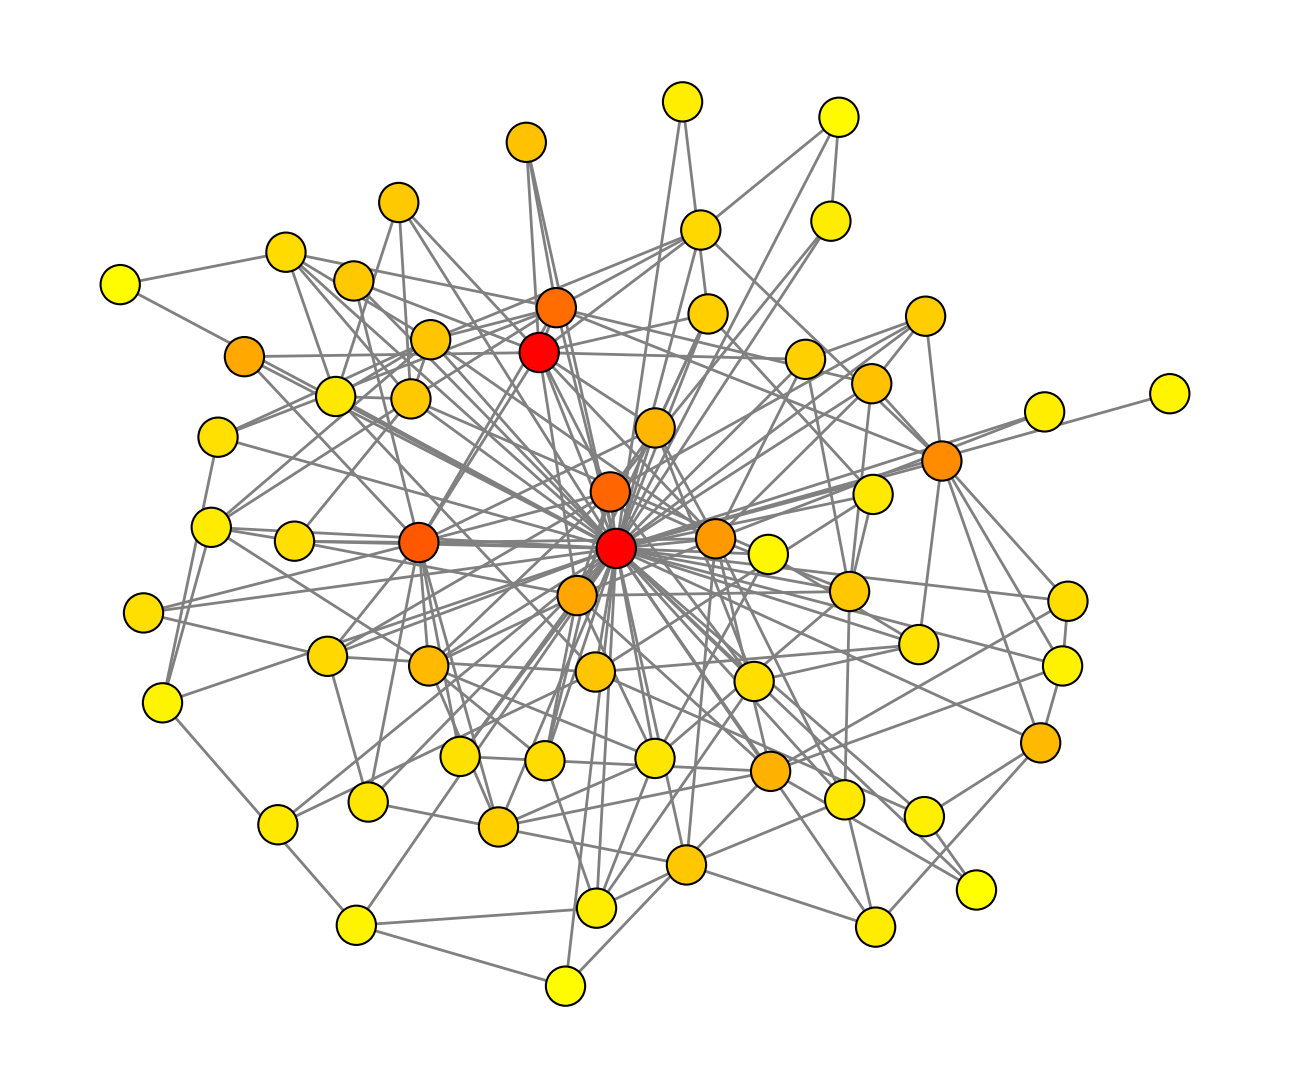

In [4]:
from src.network_plots import get_target_node_subgraph

methods = ["closeness", "betweenness", "degree", "eigenvector"]
 
for method in methods : 
    centrality_subgraph, nodes_to_include, centrality_dict, nodes_data = get_target_node_subgraph(G_rust, closeness_centrality_verse_index,method=method, lim_neighbors=100)

    plot_centrality_based_subgraph(
        text,
        centrality_subgraph,
        nodes_data,
        nodes_to_include,
        centrality_dict,
        save=True,
        file_path="data/analytics_data/" + encoder_model + "/" + parameter + "/centrality_types/"+method,
        include_labels=False
    )